**Instructions**

Your objective is to delve into the World Happiness Report dataset, which includes columns like ‘Country’, ‘Year’, ‘Happiness_Score’, ‘GDP_per_Capita’, ‘Social_Support’, ‘Healthy_Life_Expectancy’, ‘Freedom_to_Make_Life_Choices’, ‘Generosity’, and ‘Perceptions_of_Corruption’.

**Load and Inspect Data:**

Utilize pandas to load the World Happiness Report Dataset.

Examine the data to grasp its structure and contents of the year 2019.

**Data Preprocessing:**

Address missing values and adjust data types as necessary.

**Social Support and Happiness:**

Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

**Regional Comparisons of GDP and Health:**

Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.

Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.


**Importing Libraries**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

**Loading, Inspecting & Processing the Data**

In [13]:
# Uploading the files
from google.colab import files
uploaded = files.upload()

Saving 2019.csv to 2019 (2).csv


In [14]:
df = pd.read_csv("2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


The 2019 Dataset does not have the Regions column.

I will upload the 2016 dataset to extract the regions mapping



In [16]:
from google.colab import files
uploaded = files.upload()

Saving 2016.csv to 2016 (3).csv


In [17]:
# Load the 2016 dataset to extract region mapping
df_2016 = pd.read_csv('2016.csv')
region_mapping = df_2016.set_index('Country')['Region'].to_dict()

# Map regions to 2019 dataset
df['Region'] = df['Country or region'].map(region_mapping)

In [18]:
df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Region,8


In [19]:
# Manual assignments for unmatched countries(Null Region Values)
manual_regions = {
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Western Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Gambia': 'Sub-Saharan Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa'
}

# Apply manual assignments
df['Region'] = df['Region'].fillna(df['Country or region'].map(manual_regions))

In [20]:
df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Region,0


Social support vs Score (Scatter Plot)

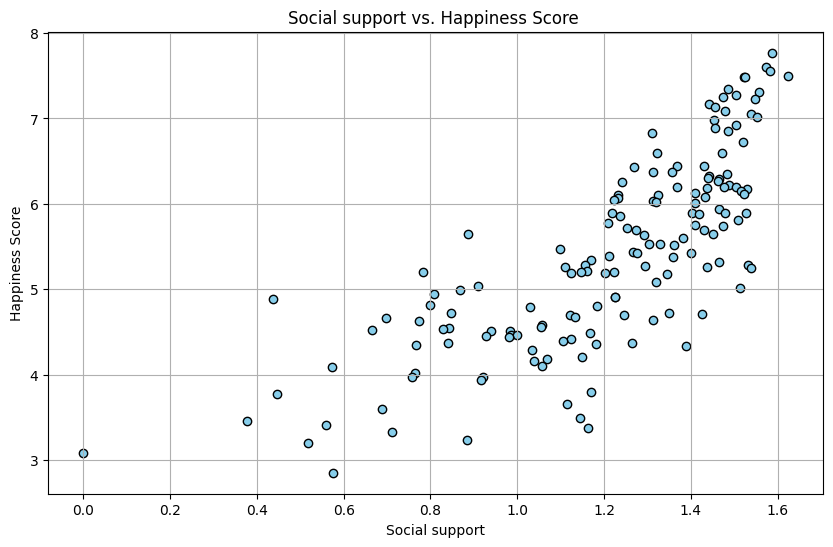

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Social support'], df['Score'], color = 'skyblue', edgecolor='black')
plt.title('Social support vs. Happiness Score ')
plt.xlabel('Social support')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

**Regional Comparison of GDP and Life Expectancy (Bar + Line Subplot)**

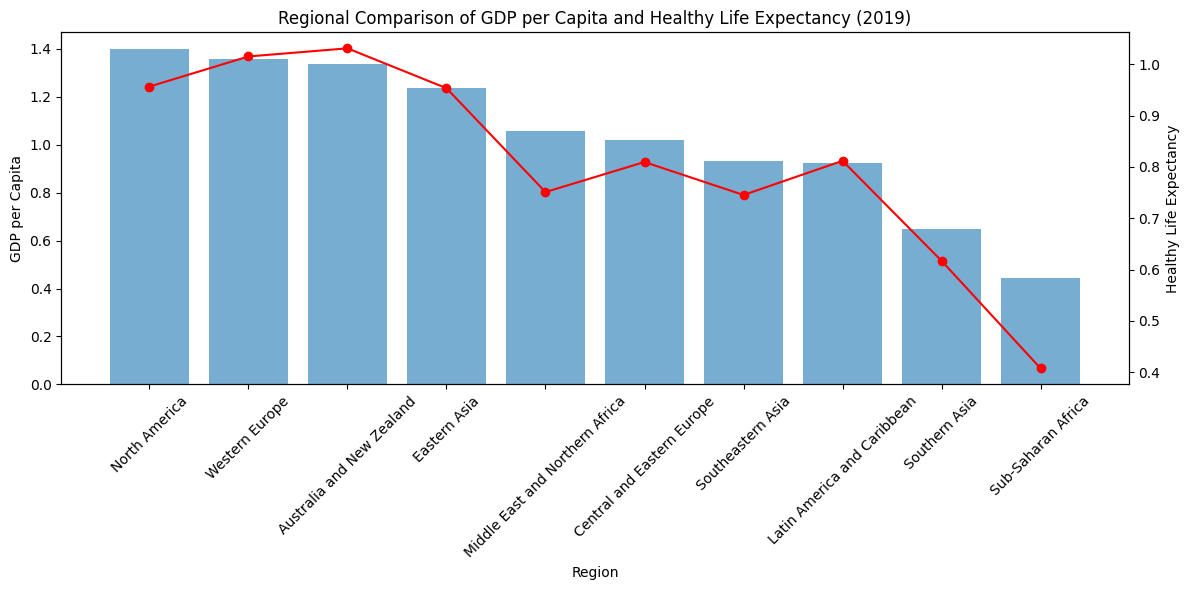

In [23]:
# Group by Region and calculate mean GDP and Life Expectancy
regional_data = df.groupby('Region').agg({
    'GDP per capita': 'mean',
    'Healthy life expectancy': 'mean'
}).sort_values(by='GDP per capita', ascending=False)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for GDP per Capita
ax1.bar(regional_data.index, regional_data['GDP per capita'], label='GDP per Capita', alpha=0.6)
ax1.set_ylabel('GDP per Capita')
ax1.set_xlabel('Region')
ax1.tick_params(axis='x', rotation=45)

# Line plot for Healthy Life Expectancy
ax2 = ax1.twinx()
ax2.plot(regional_data.index, regional_data['Healthy life expectancy'], color='red', marker='o', label='Healthy Life Expectancy')
ax2.set_ylabel('Healthy Life Expectancy')

# Title and layout
plt.title('Regional Comparison of GDP per Capita and Healthy Life Expectancy (2019)')
fig.tight_layout()
plt.show()